In [34]:
from sklearn.datasets import fetch_california_housing

In [35]:
housing=fetch_california_housing(as_frame=True)

In [36]:
data,target=housing.data,housing.target

In [37]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [38]:
target *=100
target

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: MedHouseVal, Length: 20640, dtype: float64

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [41]:
# https://scikit-learn.org/stable/modules/classes.html

regressor=DecisionTreeRegressor()

In [42]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

In [43]:
cv=ShuffleSplit(n_splits=30,test_size=0.2)
cv_results=cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True, n_jobs=2
    )

In [44]:
cv_results=pd.DataFrame(cv_results)

In [45]:
cv_results

,fit_time,score_time,test_score,train_score
0,0.163779,0.003814,-46.761697,-1.101272e-14
1,0.165781,0.003824,-45.331120,-3.552714e-15
2,0.155463,0.004234,-48.418862,-7.318866e-15
3,0.164849,0.003165,-47.668819,-3.239441e-15
4,0.152908,0.003000,-46.439042,-1.531247e-14
5,0.160414,0.002519,-46.263681,-1.352579e-14
6,0.158770,0.003008,-46.011019,-1.345005e-14
7,0.158675,0.005005,-46.843043,-3.301407e-15
8,0.164206,0.003015,-46.565642,-3.470092e-15
9,0.168729,0.002512,-47.139163,-3.625007e-15


In [46]:
scores=pd.DataFrame()

In [47]:
scores[["train_error","test_error"]]=-cv_results[["train_score","test_score"]]
scores

,train_error,test_error
0,1.101272e-14,46.761697
1,3.552714e-15,45.331120
2,7.318866e-15,48.418862
3,3.239441e-15,47.668819
4,1.531247e-14,46.439042
5,1.352579e-14,46.263681
6,1.345005e-14,46.011019
7,3.301407e-15,46.843043
8,3.470092e-15,46.565642
9,3.625007e-15,47.139163


<AxesSubplot: ylabel='Frequency'>

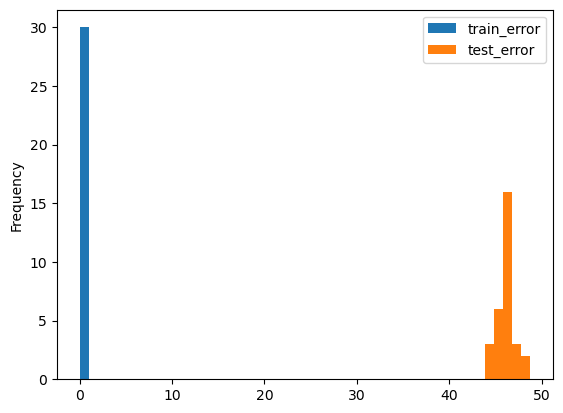

In [48]:
import matplotlib.pyplot as plt
scores.plot.hist(bins = 50)

In [49]:
from sklearn.model_selection import validation_curve

In [50]:
max_depth=[1,5,10,15,20,25]

In [51]:
from sklearn.model_selection import validation_curve
# train_scores,test_scores=validation_curve()

In [52]:
train_scores,test_scores=validation_curve(
    regressor,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [53]:
train_errors,test_errors=-train_scores,-test_scores

In [54]:
train_errors

array([[74.61257095, 74.51084515, 74.70849463, 74.57963604, 74.6329636 ,
        74.73363281, 74.49611684, 74.18945931, 74.77088047, 74.44815806,
        74.52248107, 74.58975608, 74.08275378, 74.42560529, 74.49553859,
        74.51896347, 74.65147948, 74.44639788, 74.30678347, 74.49067334,
        74.52254771, 74.42432266, 74.27137746, 74.39846754, 74.62843047,
        73.99628472, 74.4989207 , 74.59158239, 74.79833254, 74.50829375],
       [50.55470643, 50.54110652, 51.18939628, 51.44842244, 51.27989594,
        51.12809423, 51.01027299, 50.99022784, 51.36965577, 51.05783755,
        50.23026362, 51.09292279, 50.78441785, 51.42742099, 51.33326041,
        51.05737873, 51.04246054, 50.81773003, 51.08039034, 50.27075903,
        51.11700383, 50.99929283, 51.49710959, 51.09270358, 51.2731989 ,
        50.97983013, 50.65486687, 51.0740174 , 51.30479523, 50.75101512],
       [31.08724941, 31.47136375, 31.96244853, 32.40824471, 32.04878641,
        31.23765216, 32.53069984, 32.14534271, 32

<ErrorbarContainer object of 3 artists>

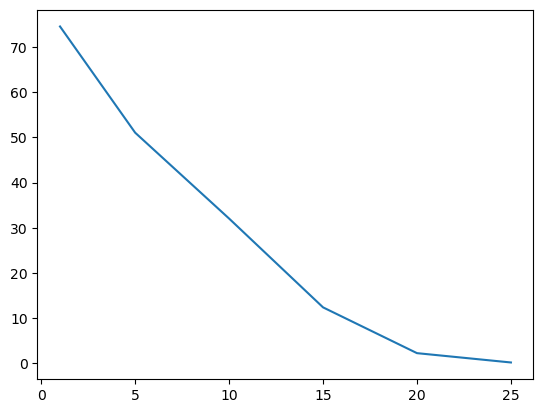

In [56]:
plt.errorbar(max_depth,train_errors.mean(axis=1))

In [ ]:
train_errors.mean(axis=1)

array([744781.54636639, 508968.7245241 , 318703.22571698, 121920.77767901,
        23034.06040011,   2111.63525091])

In [ ]:
train_errors.std(axis=1)

array([2098.40197658, 3795.12212501, 6532.75592081, 3911.44939097,
       1999.77363806,  577.05797074])

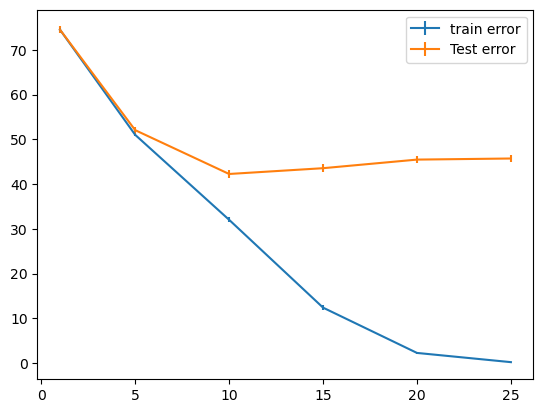

In [58]:
plt.errorbar(max_depth,train_errors.mean(axis=1),yerr=train_errors.std(axis=1), label="train error")
plt.errorbar(max_depth,test_errors.mean(axis=1), yerr=test_errors.std(axis=1),label = "Test error")
plt.legend()

# Validation curve

In [64]:
import numpy as np
train_sizes=np.linspace(0.1,1.0,num=5,endpoint=True)

In [65]:
?np.linspace

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [66]:
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [68]:
cv=ShuffleSplit(n_splits=30, random_state=None, test_size=0.2, train_size=None)

In [69]:
from sklearn.model_selection import learning_curve

In [71]:
results=learning_curve(
    regressor,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [73]:
train_size,train_scores,test_scores=results[:3]

In [74]:
train_size

array([ 1651,  5366,  9081, 12796, 16512])

In [75]:
train_scores

array([[-3.99384409e-15, -3.47739873e-15, -4.16599254e-15,
        -3.06424245e-15, -4.40700037e-15, -5.06116449e-15,
        -3.75283625e-15, -4.85458635e-15, -3.61511749e-15,
        -3.64954718e-15, -3.23639090e-15, -5.88747706e-15,
        -2.71994554e-15, -2.89209399e-15, -3.16753152e-15,
        -4.37257068e-15, -3.99384409e-15, -3.78726594e-15,
        -3.64954718e-15, -4.06270347e-15, -3.95941440e-15,
        -3.02981276e-15, -3.85612533e-15, -3.82169564e-15,
        -1.75591421e-15, -3.51182842e-15, -3.71840656e-15,
        -3.09867214e-15, -4.75129728e-15, -3.09867214e-15],
       [-3.29450303e-15, -2.68009411e-15, -4.14726025e-15,
        -3.47458841e-15, -3.93009847e-15, -3.38984235e-15,
        -3.86653893e-15, -3.23094349e-15, -3.55933446e-15,
        -3.80297938e-15, -3.04026486e-15, -4.45976134e-15,
        -3.68645355e-15, -2.83899297e-15, -3.04026486e-15,
        -3.58052098e-15, -3.24153674e-15, -2.81780645e-15,
        -3.23094349e-15, -3.01907834e-15, -4.13137036e-

In [76]:
train_errors,test_errors=-train_scores,-test_scores

Text(0, 0.5, 'Mean absolute error, thousands of US Dollars')

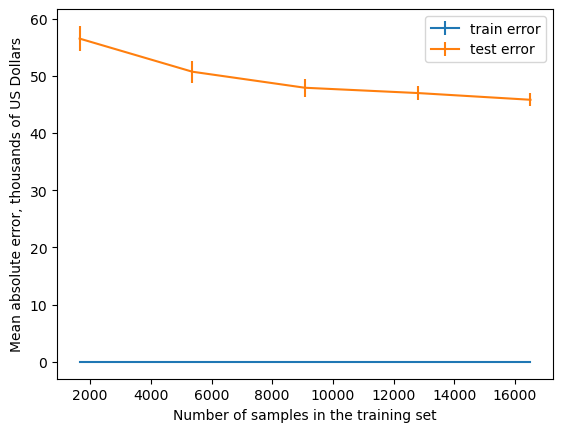

In [84]:
plt.errorbar(train_size,train_errors.mean(axis=1),yerr=train_errors.std(axis=1), label="train error")
plt.errorbar(train_size,test_errors.mean(axis=1),yerr=test_errors.std(axis=1), label="test error")
plt.legend()
#plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error, thousands of US Dollars")